In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [2]:
df = pd.read_excel(r'Verkada - MQL case study - Growth (1).xlsx', sheet_name='Raw')
# Make a column for the date of the start of the week
df['Week_Start'] = df['MQL Created Date'].dt.to_period('W').apply(lambda x: x.start_time)


### What is the overall MQL to SQL conversion rate by week?
SQL conversion rate dropped overall over the span of 4 weeks (47%, 47%, 34%, 39%).  

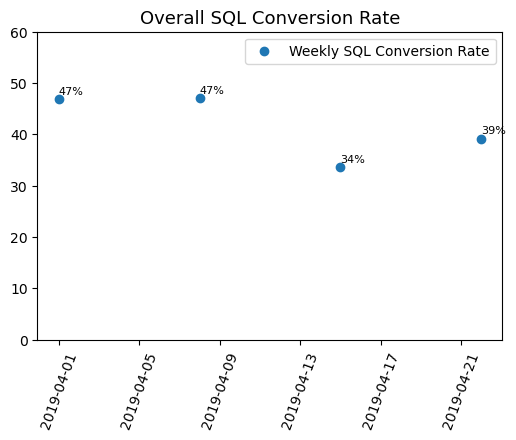

In [3]:
df_week = df.groupby(['Week_Start',  'Client Status'])['MQL Created Date'].count()
pct = 100*(df_week/ df_week.groupby(level=[0]).sum()).values
df_week = df_week.reset_index()
df_week['pct'] = pct
df_week
df_week_sql = df_week[df_week['Client Status'] == 'SQL']

# draw a graph
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(
df_week_sql['Week_Start']
,df_week_sql['pct'],
label = 'Weekly SQL Conversion Rate')

# add labels 
x = list(df_week_sql['Week_Start'])
y = list(df_week_sql['pct'])
for i, txt in enumerate(y):
    ax.annotate(str(int(round(txt))) + '%', (x[i], y[i]+1), size = 8)
        
plt.legend()
plt.ylim([0, 60])
plt.xticks(rotation=70)
plt.title('Overall SQL Conversion Rate', fontsize = 13)
plt.show()


### How did the number of clients and their status change over the past 4 weeks?

Number of clients increased from 96 to 1519 in three weeks

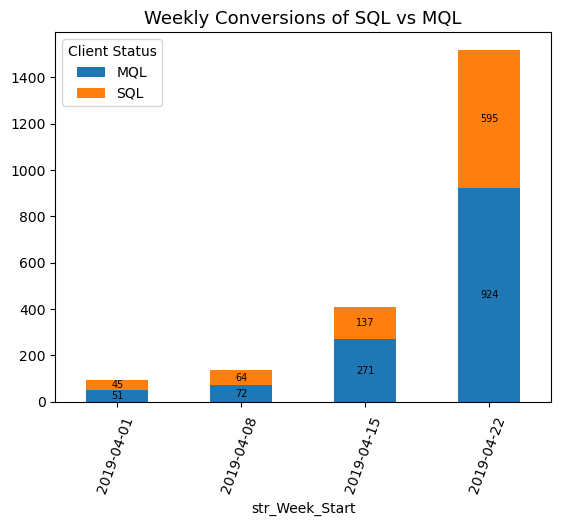

In [4]:
# adding string type of week (for visualization purpose)
df_week['str_Week_Start'] = df_week['Week_Start'].apply(lambda x : str(x)[:11])

dfp = df_week.pivot_table(index = 'str_Week_Start',
               columns = 'Client Status' , values = 'MQL Created Date', aggfunc='sum')




ax = dfp.plot(kind = 'bar', stacked = True)
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [int(v.get_height() )if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center', size = 7)
plt.xticks(rotation=70)
plt.title('Weekly Conversions of SQL vs MQL', fontsize = 13)
plt.show()

### How did their clients’ sources change over the past four weeks?

The sources have changed over the past four weeks. <br>
The number of paid social increased from 22 to 1184, and direct mail rose from 11 to 201. <br>
I will look into the average conversion rate broken down by source.

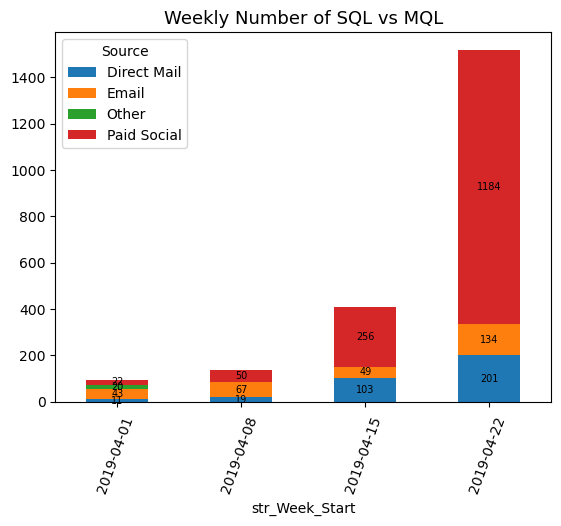

In [5]:
# group by week start and source and count source
df_source = df.groupby(['Week_Start',  'Source'])['MQL Created Date'].count()
pct = 100*(df_source/ df_source.groupby(level=[0]).sum()).values
df_source = df_source.reset_index()
df_source['pct'] = pct
df_source

# adding string type of week (for visualization purpose)
df_source['str_Week_Start'] = df_source['Week_Start'].apply(lambda x : str(x)[:11])


# pivot a table to make a stacked chart
dfp = df_source.pivot_table(index = 'str_Week_Start',
               columns = 'Source' , values = 'MQL Created Date', aggfunc='sum')


# draw a stacked chart
ax = dfp.plot(kind = 'bar', stacked = True)
for c in ax.containers:
    labels = [int(v.get_height() )if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', size = 7)
plt.xticks(rotation=70)
plt.title('Weekly Number of SQL vs MQL', fontsize = 13)
plt.show()

### Average Conversion Rate Broken Down by Source and Week

1. During the 4-week span, the average conversion rate for paid social, direct email, other, and Email are 31%, 38%, 45%, and 83% respectively. 
2. Source = 'Other' only appeared in the week of 04/01 and has a higher conversion rate (45%) than direct mail and paid social. 
3. If you break it down by sources, the conversion rates monotonically went up at the source level. Email  (70%-> 72%-> 84%-> 93%). Direct Emaill (18%-> 26%-> 35%-> 41%). Paid Social (18% -> 22% -> 23% -> 33%). 
4. SQL conversion rate dropped overall since the number of paid social and daily mail increased


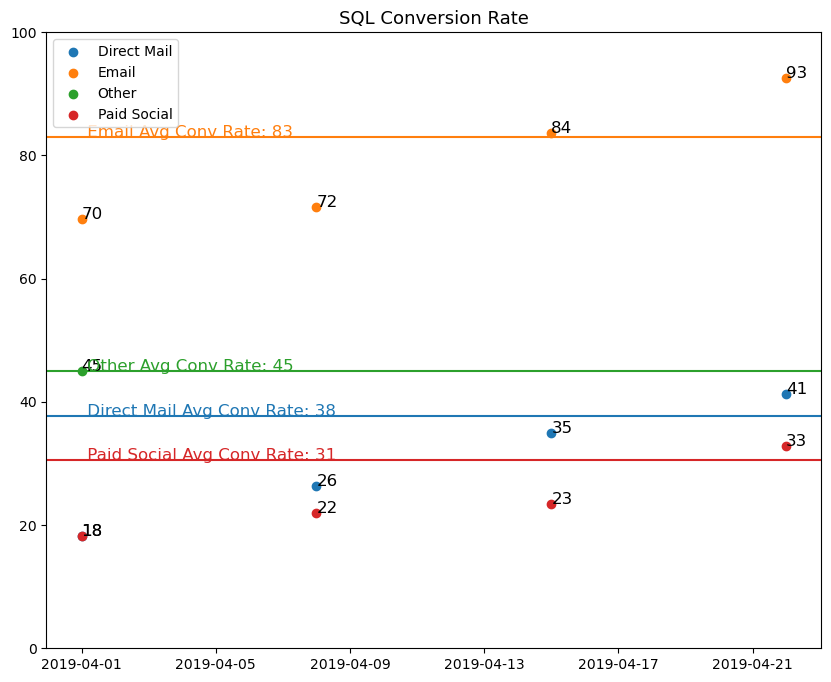

In [6]:
# compute average conversion rate of each source at weekly level during the 4 weeks

df_source = df.groupby(['Week_Start', 'Source',  'Client Status']).count()
df_source['pct'] = df_source/ df_source.groupby(level=[0,1]).sum()
df_source = df_source.reset_index()
df_source_sql = df_source[df_source['Client Status'] == 'SQL']
df_source_sql


# compute average conversion rate of each source during the 4 weeks
df_source_ = df_source.groupby(['Source', 'Client Status'])['MQL Created Date'].sum()
pct = (df_source_/ df_source_.groupby(level=[0]).sum()).values
df_source_ = df_source_.reset_index()
df_source_['pct'] = pct
df_source_sql_ = df_source_[df_source_['Client Status'] == 'SQL']
df_source_sql_



# draw the 
fig, ax = plt.subplots(figsize=(10,8))
classes = list(df_source_sql['Source'].unique())
defaut_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for ith, c in enumerate(classes):
    sub = df_source_sql.loc[df_source_sql ['Source'] == c]
    sub_ = df_source_sql_[df_source_sql_['Source'] == c]
    x = list(sub['Week_Start'])
    y = list(100*sub['pct'])
    # draw the average conversion rate at weekly level
    ax.scatter(sub['Week_Start'], 100*sub['pct'], label=c, color = defaut_colors[ith])
    # draw the average converstion rate
    ax.axhline(sub_['pct'].values[0]* 100, color = defaut_colors[ith])
    for i, txt in enumerate(y):
        ax.annotate(int(round(txt)), (x[i], y[i]), size = 12)
    ax.annotate(" " + c + " Avg Conv Rate: " + str(int(round(sub_['pct'].values[0]* 100))) 
                , 
                (x[0], sub_['pct'].values[0]* 100), color = defaut_colors[ith], size = 12)
plt.legend()
plt.ylim([0, 100]) 
plt.title('SQL Conversion Rate', fontsize = 13)
plt.show()